Name : Soumya Raj Poddar

Email : soumyarajpoddar@gmail.com

# Pre-Processing & Setting up data

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy import optimize, stats


In [41]:
df=pd.read_csv("C:\\baseball_hitters_assignment2.csv")
df.head()

Hitter'sName   x1   x2  x3  x4  x5  x6  x7    x8    x9  x10  x11  x12  \
0     Andy Allanson  293   66   1  30  29  14   1   293    66    1   30   29   
1        Alan Ashby  315   81   7  24  38  39  14  3449   835   69  321  414   
2       Alvin Davis  479  130  18  66  72  76   3  1624   457   63  224  266   
3      Andre Dawson  496  141  20  65  78  37  11  5628  1575  225  828  838   
4  Andres Galarraga  321   87  10  39  42  30   2   396   101   12   48   46   

   x13 x14  x15  x16  x17      y  
0   14   A  446   33   20    NaN  
1  375   N  632   43   10  475.0  
2  263   A  880   82   14  480.0  
3  354   N  200   11    3  500.0  
4   33   N  805   40    4   91.5

In [42]:
df.isnull().sum()

Hitter'sName     0
x1               0
x2               0
x3               0
x4               0
x5               0
x6               0
x7               0
x8               0
x9               0
x10              0
x11              0
x12              0
x13              0
x14              0
x15              0
x16              0
x17              0
y               59
dtype: int64

Dropping Null Rows

In [43]:
df.dropna(axis=0, inplace=True)

In [44]:
df.drop("Hitter'sName", axis =1, inplace=True)
df

x1   x2  x3  x4  x5  x6  x7    x8    x9  x10  x11  x12  x13 x14   x15  \
1    315   81   7  24  38  39  14  3449   835   69  321  414  375   N   632   
2    479  130  18  66  72  76   3  1624   457   63  224  266  263   A   880   
3    496  141  20  65  78  37  11  5628  1575  225  828  838  354   N   200   
4    321   87  10  39  42  30   2   396   101   12   48   46   33   N   805   
5    594  169   4  74  51  35  11  4408  1133   19  501  336  194   A   282   
..   ...  ...  ..  ..  ..  ..  ..   ...   ...  ...  ...  ...  ...  ..   ...   
317  497  127   7  65  48  37   5  2703   806   32  379  311  138   N   325   
318  492  136   5  76  50  94  12  5511  1511   39  897  451  875   A   313   
319  475  126   3  61  43  52   6  1700   433    7  217   93  146   A    37   
320  573  144   9  85  60  78   8  3198   857   97  470  420  332   A  1314   
321  631  170   9  77  44  31  11  4908  1457   30  775  357  249   A   408   

     x16  x17       y  
1     43   10   475.0  
2     82   14   480.0  
3     11    3   500.0  
4     40    4    91.5  
5    421   25   750.0  
..   ...  ...     ...  
317    9    3   700.0  
318  381   20   875.0  
319  113    7   385.0  
320  131   12   960.0  
321    4    3  1000.0  

[263 rows x 18 columns]

# SLR

In [45]:
X = df['x7']
X = sm.add_constant(X)
Y = df['y']
m_slr = sm.OLS(Y,X)
m_slr_fit = m_slr.fit()
print(m_slr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     49.91
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.46e-11
Time:                        10:31:37   Log-Likelihood:                -1957.1
No. Observations:                 263   AIC:                             3918.
Df Residuals:                     261   BIC:                             3925.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        260.2341     46.636      5.580      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Values of estimates :

> a = 260.2341,


> b = 37.7051, 


> R^2 = 0.161, 



> Adjusted R^2 = 0.157




95% Confidence Intervals :


> a = {168.402, 352.066} 


> b = {27.196, 48.215}









**Hypothesis Testing for parameter a** :

Ho : a = 0

H1 : a ≠ 0

Ho is to be rejected since **a** parameter's 95% confidence interval lies between {168.402 , 352.066}

Hence, a ≠ 0

**Hypothesis Testing for parameter b :**

Ho : b = 0

H1 : b ≠ 0

Ho is to be rejected since a parameter's 95% confidence interval lies between {27.196, 48.215}

Hence, b ≠ 0

C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\soumy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


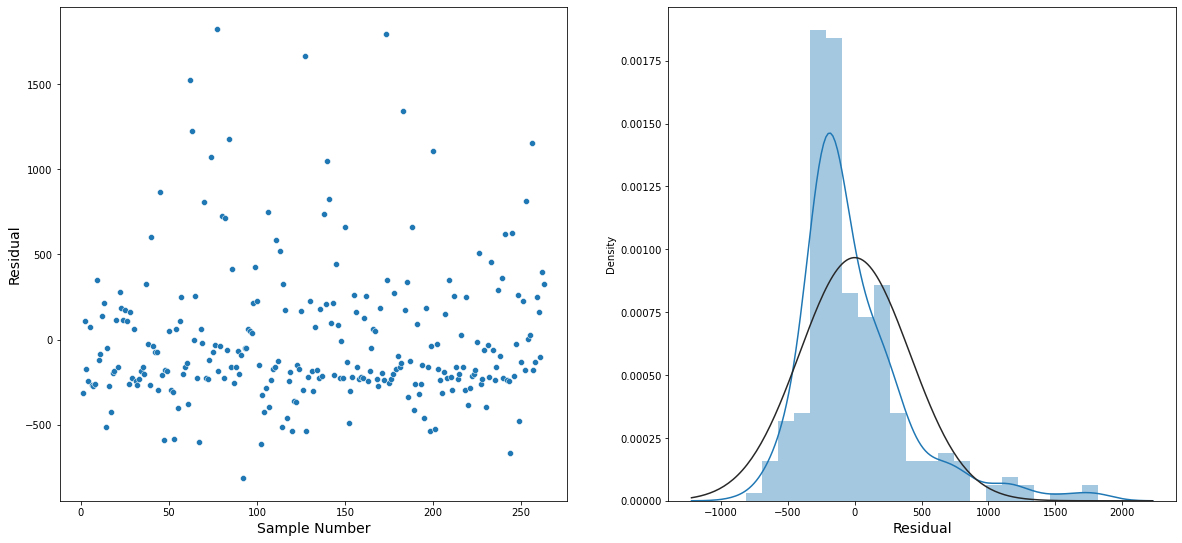

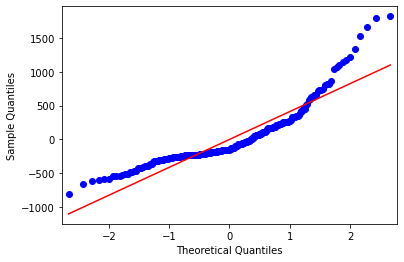

<Figure size 432x288 with 0 Axes>

In [46]:
plt.figure(figsize= (20,20))

plt.subplot(2,2,3)
sns.scatterplot(np.arange(1, X.shape[0]+1), m_slr_fit.resid)
plt.xlabel('Sample Number', fontsize = 14)
plt.ylabel('Residual', fontsize = 14)

plt.subplot(2,2,4)
sns.distplot(m_slr_fit.resid, fit=stats.norm)
plt.xlabel('Residual', fontsize = 14)

sm.qqplot(m_slr_fit.resid, line= 's')
plt.show()
plt.tight_layout()

C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\soumy\anacond

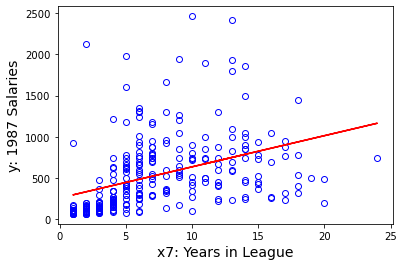

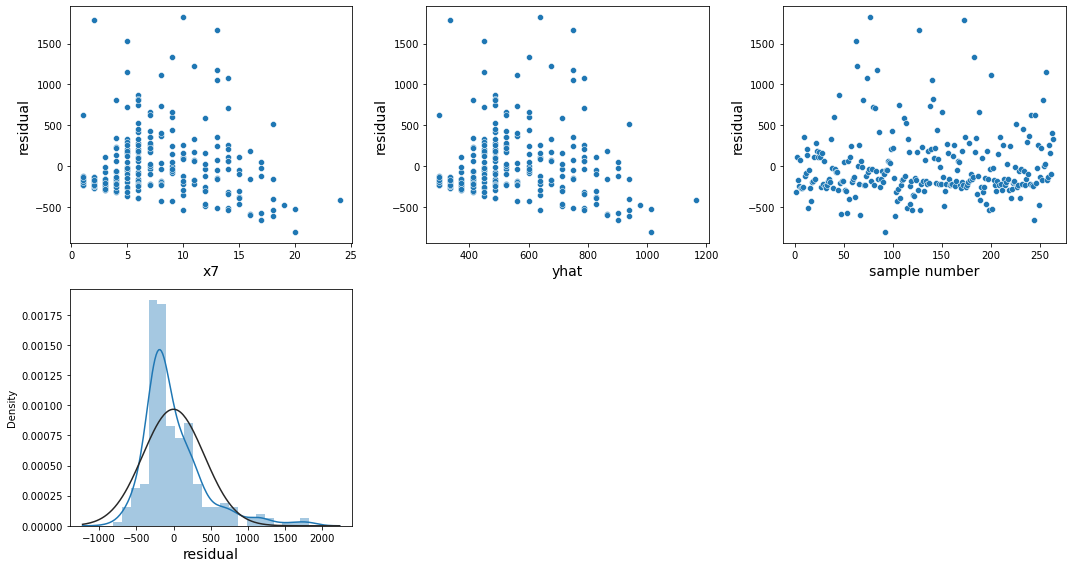

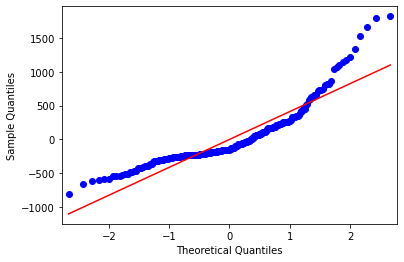

In [47]:
from scipy import optimize, stats
Y = df[['y']]
plt.figure(num=1)
plt.plot(X.x7, Y.y, linestyle = "None", marker = "o", markerfacecolor = "None", color = "b")
plt.plot(X.x7, m_slr_fit.predict(),'r')
plt.xlabel('x7: Years in League', fontsize=14)
plt.ylabel('y: 1987 Salaries', fontsize=14)

#sns.pairplot(X)
plt.figure(num=2, figsize=(15,8))

plt.subplot(2,3,1)
sns.scatterplot(X.x7, m_slr_fit.resid)
plt.xlabel('x7', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,2)
sns.scatterplot(m_slr_fit.predict(), m_slr_fit.resid)
plt.xlabel('yhat', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,3)
sns.scatterplot(np.arange(1, df.shape[0]+1), m_slr_fit.resid)
plt.xlabel('sample number', fontsize=14)
plt.ylabel('residual', fontsize=14)


plt.subplot(2,3,4)
sns.distplot(m_slr_fit.resid, fit=stats.norm)
plt.xlabel('residual', fontsize=14)
plt.tight_layout()

sm.qqplot(m_slr_fit.resid,line='s')
plt.show()

In [48]:
def grab_col_names(dataframe, cat_th=10, car_th=20): 


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

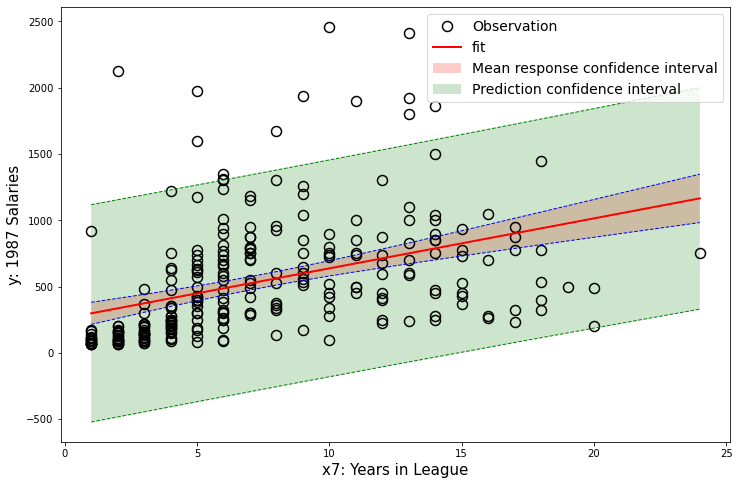

In [49]:
from statsmodels.stats.outliers_influence import summary_table

dt = summary_table(m_slr_fit, alpha = 0.05)[1]

# sorting to avoid issues while line plotting
x_arr = np.asanyarray(X.x7)
I = np.argsort(x_arr)
dt[:] = dt[I,:]
Xx1 = x_arr[I].copy()
yy = np.asanyarray(Y.y)[I].copy()

# prstd, iv_l, iv_u = wls_prediction_std(mod_simp_fit) # diff funct for Confidence intervals around the predictions

y_fit = dt[:, 2] # predicted value

y_fit_ci_lower = dt[:, 4] # CI of the mean response
y_fit_ci_upper = dt[:, 5]

y_pred_ci_lower = dt[:, 6] # CI of the predicted response
y_pred_ci_upper = dt[:, 7]

# Plot the CI's:
plt.figure(figsize=(12, 8))
plt.plot(Xx1, yy, linestyle = "None", marker = "o", markeredgewidth=1.5, markersize=10, markerfacecolor = "None", color = "black", label = 'Observation')
plt.plot(Xx1, y_fit, color = "red", label = 'fit', linewidth = 2)
plt.xlabel('x7: Years in League', fontsize=15)
plt.ylabel('y: 1987 Salaries', fontsize=15)
plt.plot(Xx1, y_fit_ci_lower, color = "blue", linestyle = "--", linewidth = 1)
plt.plot(Xx1, y_fit_ci_upper, color = "blue", linestyle = "--", linewidth = 1)
plt.fill_between(Xx1, y_fit_ci_lower, y_fit_ci_upper, facecolor='red', alpha=0.2, label = 'Mean response confidence interval')
plt.plot(Xx1, y_pred_ci_lower, color = "green", linestyle = "--", linewidth = 1)
plt.plot(Xx1, y_pred_ci_upper, color = "green", linestyle = "--", linewidth = 1)
plt.fill_between(Xx1, y_pred_ci_lower, y_pred_ci_upper, facecolor='g', alpha=0.2, label = 'Prediction confidence interval')
# plt.grid()
plt.legend(fontsize=14)
# plt.tight_layout()

x1 - False
x2 - False
x3 - False
x4 - False
x5 - False
x6 - False
x7 - False
x8 - False
x9 - False
x10 - False
x11 - False
x12 - False
x13 - False
x15 - False
x16 - False
x17 - False
y - False


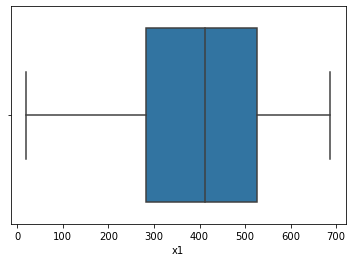

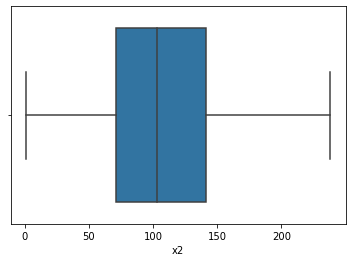

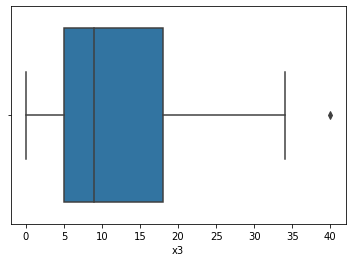

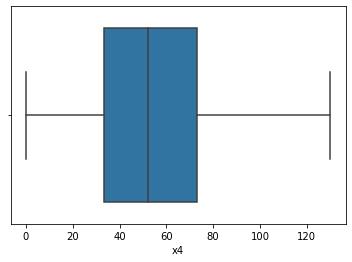

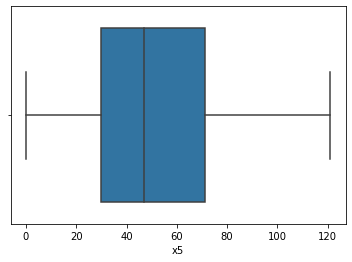

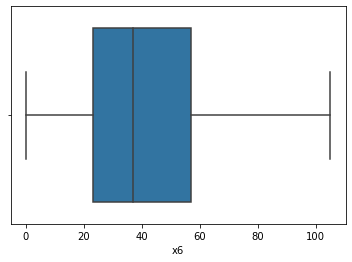

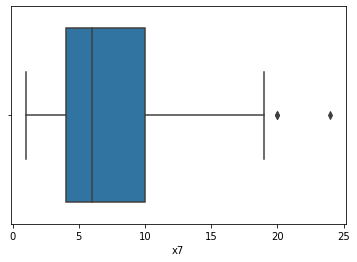

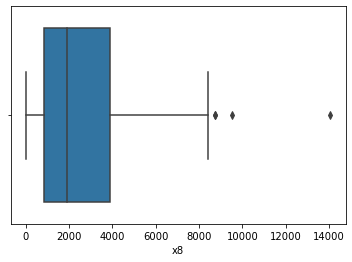

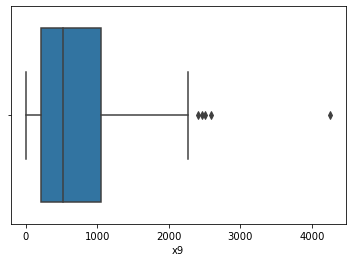

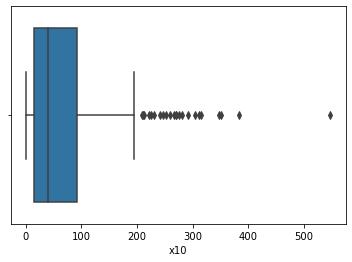

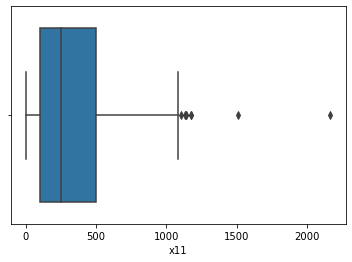

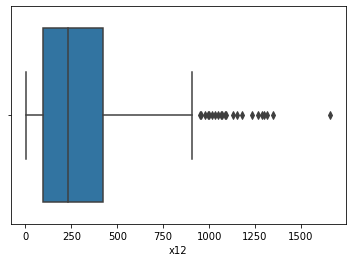

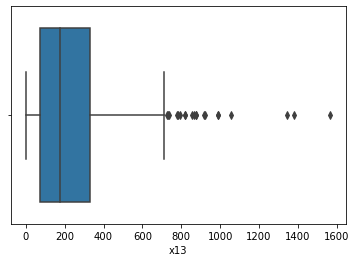

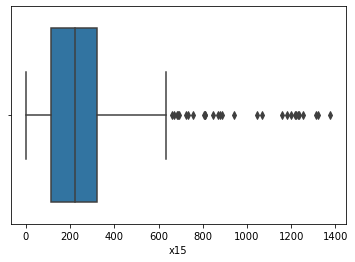

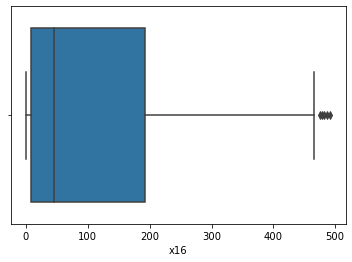

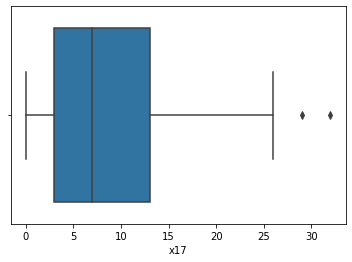

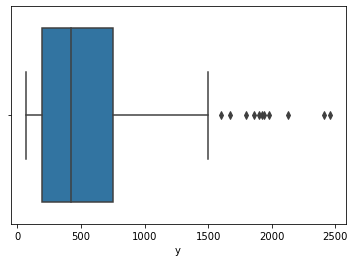

In [50]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


for col in num_cols:
    print(col,"-", check_outlier(df, col))
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show()

ROC Curve for Logistic Regression Model

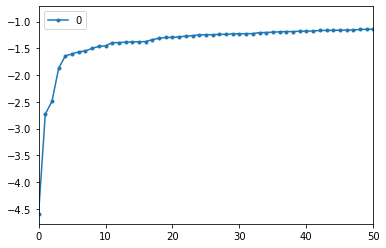

In [51]:
clf = LocalOutlierFactor(n_neighbors=5)
num_cols2 = [col for col in num_cols if "y" not in col]
clf.fit_predict(df[num_cols2])
df_scores = clf.negative_outlier_factor_
np.sort(df_scores)[0:5]
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0, 50], style='.-')
plt.show()

# MLR

In [52]:
X = df[['x7']]
X['years square'] = df['x7']**2
X = sm.add_constant(X)
m_mlr = sm.OLS(Y,X)
m_mlr_fit = m_mlr.fit()
print(m_mlr_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     44.87
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.82e-17
Time:                        10:31:41   Log-Likelihood:                -1941.1
No. Observations:                 263   AIC:                             3888.
Df Residuals:                     260   BIC:                             3899.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -57.4425     70.264     -0.818   

C:\Users\soumy\AppData\Local\Temp/ipykernel_1732/125215932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['years square'] = df['x7']**2
C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Values of estimates** :


> a = -57.4425,

> b = 137.6267,

> c = -5.4081,

> R^2 = 0.257,

> Adjusted R^2 = 0.251


**95% Confidence Intervals** :


> a = {-195.801 , 80.916}

> b = {102.266 , 172.988}

> c = {-7.245 , -3.571}


**Hypothesis Testing for parameter a**:


> Ho : a = 0

> H1 : a ≠ 0

> Ho is not to be rejected since **a** parameter's 95% confidence interval lies between {-195.801 , 80.916}

> Hence, a = 0


**Hypothesis Testing for parameter b**:


> Ho : b = 0

> H1 : b ≠ 0

> Ho is to be rejected since **b** parameter's 95% confidence interval lies between {102.266 , 172.988}

> Hence, b ≠ 0

**Hypothesis Testing for parameter c**:


> Ho : c = 0

> H1 : c ≠ 0

> Ho is to be rejected since **c** parameter's 95% confidence interval lies between {-7.245 , -3.571}

> Hence, c ≠ 0


C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\soumy\anacond

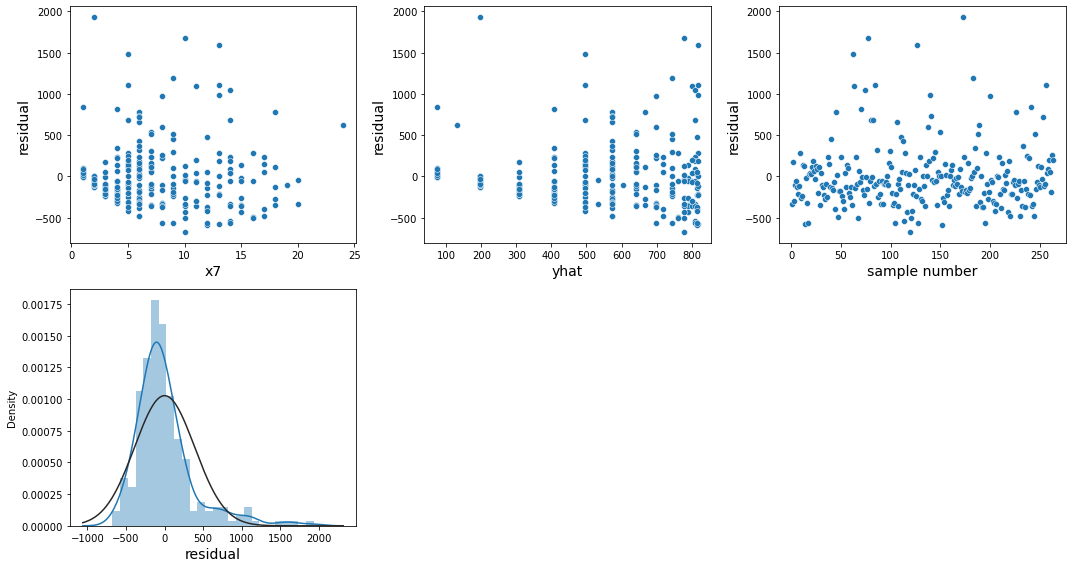

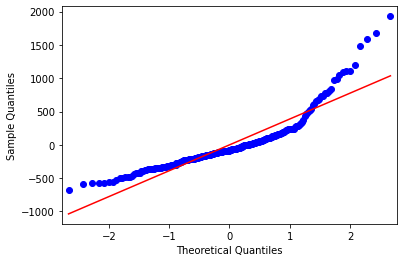

In [53]:
#sns.pairplot(X)
plt.figure(num=2, figsize=(15,8))

plt.subplot(2,3,1)
sns.scatterplot(X.x7, m_mlr_fit.resid)
plt.xlabel('x7', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,2)
sns.scatterplot(m_mlr_fit.predict(), m_mlr_fit.resid)
plt.xlabel('yhat', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,3)
sns.scatterplot(np.arange(1, df.shape[0]+1), m_mlr_fit.resid)
plt.xlabel('sample number', fontsize=14)
plt.ylabel('residual', fontsize=14)

plt.subplot(2,3,4)
sns.distplot(m_mlr_fit.resid, fit=stats.norm)
plt.xlabel('residual', fontsize=14)

plt.tight_layout()

sm.qqplot(m_mlr_fit.resid,line='s')
plt.show()

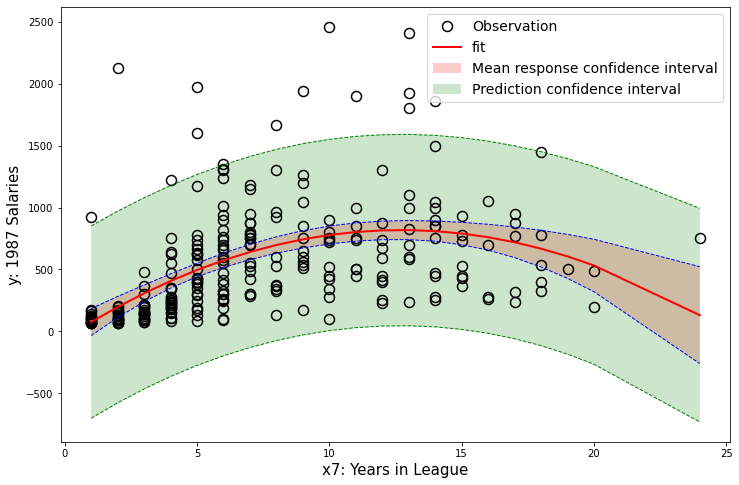

In [54]:
from statsmodels.stats.outliers_influence import summary_table

dt = summary_table(m_mlr_fit, alpha = 0.05)[1]

# sorting to avoid issues while line plotting
x_arr = np.asanyarray(X.x7)
I = np.argsort(x_arr)
dt[:] = dt[I,:]
Xx1 = x_arr[I].copy()
yy = np.asanyarray(Y.y)[I].copy()

# prstd, iv_l, iv_u = wls_prediction_std(mod_simp_fit) # diff funct for Confidence intervals around the predictions

y_fit = dt[:, 2] # predicted value

y_fit_ci_lower = dt[:, 4] # CI of the mean response
y_fit_ci_upper = dt[:, 5]

y_pred_ci_lower = dt[:, 6] # CI of the predicted response
y_pred_ci_upper = dt[:, 7]

# Plot the CI's:
plt.figure(figsize=(12, 8))
plt.plot(Xx1, yy, linestyle = "None", marker = "o", markeredgewidth=1.5, markersize=10, markerfacecolor = "None", color = "black", label = 'Observation')
plt.plot(Xx1, y_fit, color = "red", label = 'fit', linewidth = 2)
plt.xlabel('x7: Years in League', fontsize=15)
plt.ylabel('y: 1987 Salaries', fontsize=15)
plt.plot(Xx1, y_fit_ci_lower, color = "blue", linestyle = "--", linewidth = 1)
plt.plot(Xx1, y_fit_ci_upper, color = "blue", linestyle = "--", linewidth = 1)
plt.fill_between(Xx1, y_fit_ci_lower, y_fit_ci_upper, facecolor='red', alpha=0.2, label = 'Mean response confidence interval')
plt.plot(Xx1, y_pred_ci_lower, color = "green", linestyle = "--", linewidth = 1)
plt.plot(Xx1, y_pred_ci_upper, color = "green", linestyle = "--", linewidth = 1)
plt.fill_between(Xx1, y_pred_ci_lower, y_pred_ci_upper, facecolor='g', alpha=0.2, label = 'Prediction confidence interval')
# plt.grid()
plt.legend(fontsize=14)
# plt.tight_layout()

Between SLR and MLR, it is the MLR model that is the better option as it gives a prediction accuracy of 25.7%. However, we will be proceeding with the Brute Force method for a higher accuracy model.

# Building First Regression Model 
(using Log Salary as dependant variable and with squared salary)

In [55]:
data = df.copy()
data['league']=pd.get_dummies(df['x14'],drop_first=True)
data.drop('x14', axis =1, inplace=True)
data.head()

x1   x2  x3  x4  x5  x6  x7    x8    x9  x10  x11  x12  x13  x15  x16  \
1  315   81   7  24  38  39  14  3449   835   69  321  414  375  632   43   
2  479  130  18  66  72  76   3  1624   457   63  224  266  263  880   82   
3  496  141  20  65  78  37  11  5628  1575  225  828  838  354  200   11   
4  321   87  10  39  42  30   2   396   101   12   48   46   33  805   40   
5  594  169   4  74  51  35  11  4408  1133   19  501  336  194  282  421   

   x17      y  league  
1   10  475.0       1  
2   14  480.0       0  
3    3  500.0       1  
4    4   91.5       1  
5   25  750.0       0

In [56]:
Y = np.log(data['y'])
X = data.copy()

In [57]:
X = sm.add_constant(X)

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
X['y square'] = X['x7']**2
X.drop("y", axis =1, inplace=True)
X

const   x1   x2  x3  x4  x5  x6  x7    x8    x9  x10  x11  x12  x13  \
1      1.0  315   81   7  24  38  39  14  3449   835   69  321  414  375   
2      1.0  479  130  18  66  72  76   3  1624   457   63  224  266  263   
3      1.0  496  141  20  65  78  37  11  5628  1575  225  828  838  354   
4      1.0  321   87  10  39  42  30   2   396   101   12   48   46   33   
5      1.0  594  169   4  74  51  35  11  4408  1133   19  501  336  194   
..     ...  ...  ...  ..  ..  ..  ..  ..   ...   ...  ...  ...  ...  ...   
317    1.0  497  127   7  65  48  37   5  2703   806   32  379  311  138   
318    1.0  492  136   5  76  50  94  12  5511  1511   39  897  451  875   
319    1.0  475  126   3  61  43  52   6  1700   433    7  217   93  146   
320    1.0  573  144   9  85  60  78   8  3198   857   97  470  420  332   
321    1.0  631  170   9  77  44  31  11  4908  1457   30  775  357  249   

      x15  x16  x17  league  y square  
1     632   43   10       1       196  
2     880   82   14       0         9  
3     200   11    3       1       121  
4     805   40    4       1         4  
5     282  421   25       0       121  
..    ...  ...  ...     ...       ...  
317   325    9    3       1        25  
318   313  381   20       0       144  
319    37  113    7       0        36  
320  1314  131   12       0        64  
321   408    4    3       0       121  

[263 rows x 19 columns]

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=X['league'],test_size=0.25,random_state=1)

<AxesSubplot:xlabel='Log of salary', ylabel='Count'>

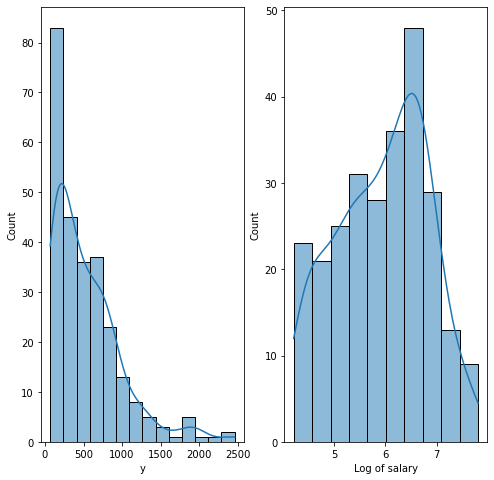

In [60]:
df['Log of salary']=np.log(df['y'])
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.histplot(x=df['y'],kde =True)

plt.subplot(1,2,2)
sns.histplot(x=df['Log of salary'], kde =True)

Creating First Model with all Regressors

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     27.85
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.23e-42
Time:                        10:31:42   Log-Likelihood:                -128.13
No. Observations:                 197   AIC:                             294.3
Df Residuals:                     178   BIC:                             356.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8607      0.160     24.078      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


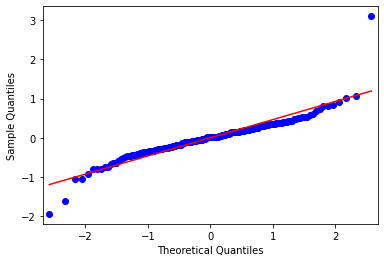

In [61]:
m_1 = sm.OLS(Y_train, X_train)
m_1_fit = m_1.fit()
print(m_1_fit.summary())
sm.qqplot(m_1_fit.resid, line= 's')
plt.show()

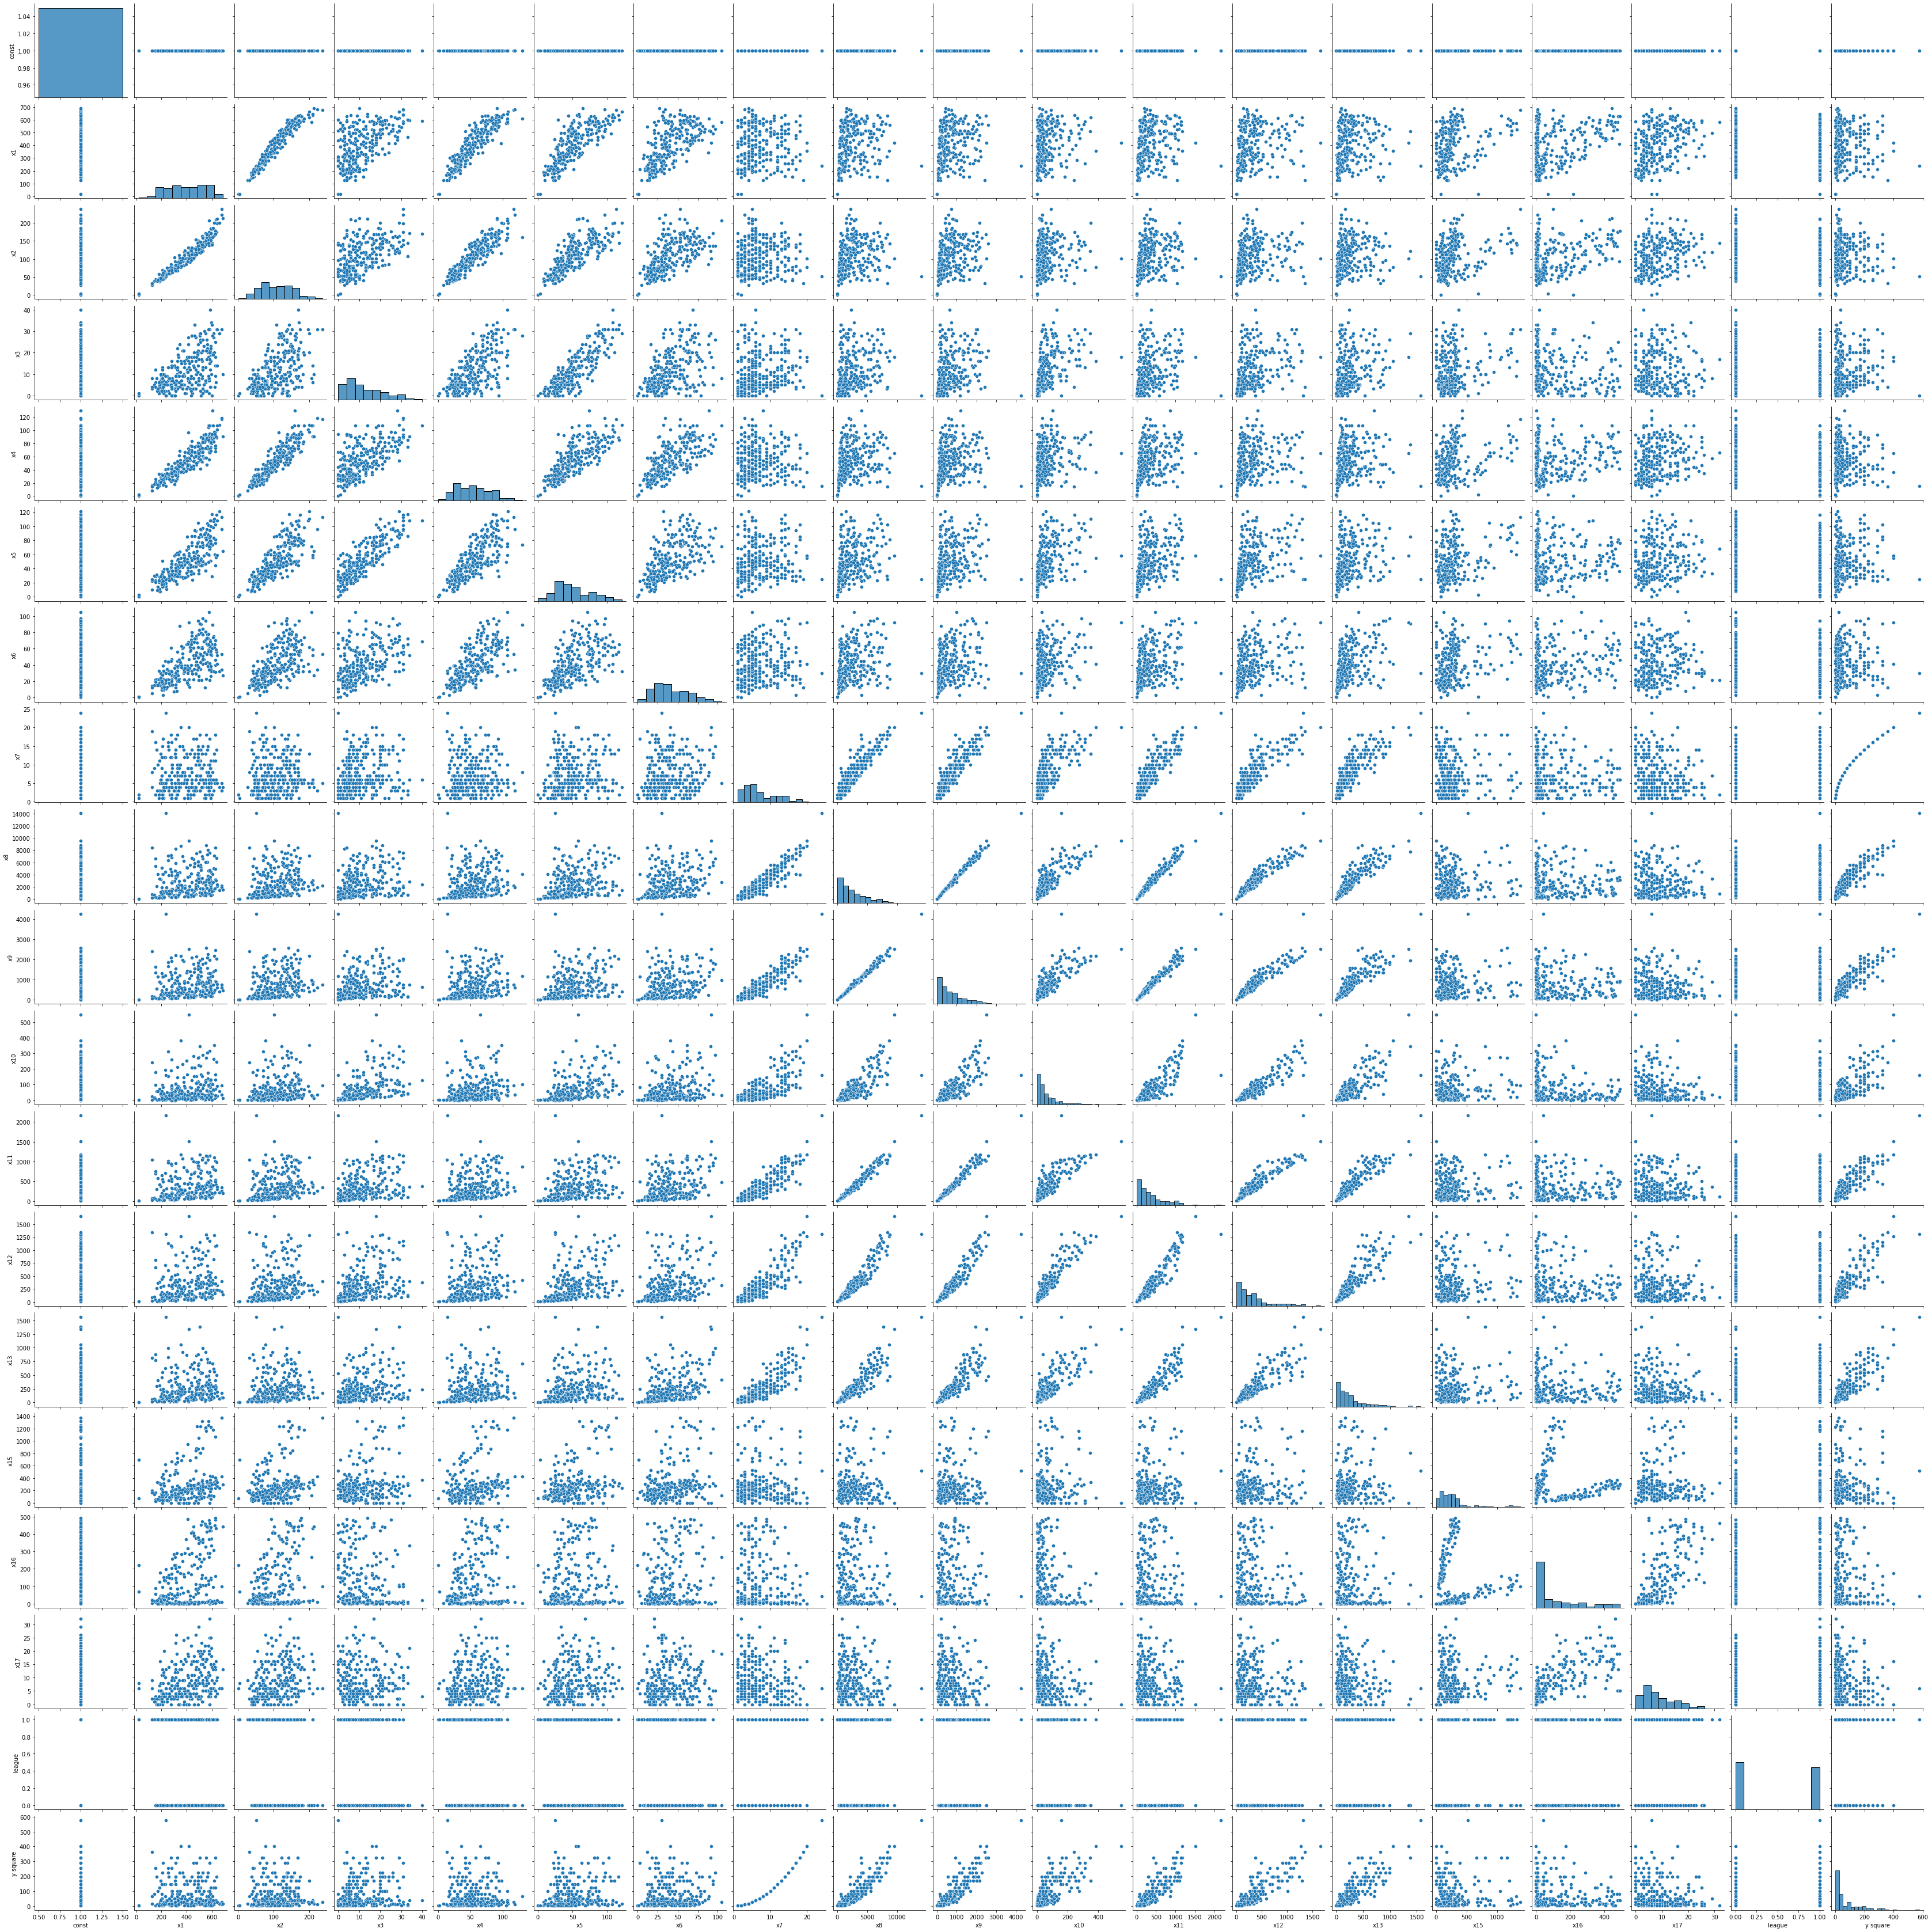

In [62]:
sns.pairplot(X)

Creating Model 2

In [63]:
X_train2 = X_train.drop(['x3'],axis=1)
X_test2 = X_test.drop(['x3'],axis=1)
X_train2

const   x1   x2  x4   x5  x6  x7    x8    x9  x10   x11   x12   x13  x15  \
249    1.0  419  101  65   58  92  20  9528  2510  548  1509  1659  1342    0   
130    1.0  306  104  50   58  25   7  2954   822   55   313   377   187  116   
58     1.0  313   78  32   41  12  12  3742   968   35   409   321   170  106   
184    1.0  586  159  72   79  53   9  3082   880   83   363   477   295  181   
99     1.0  424  110  70   47  36   7  2130   544   38   335   174   258  292   
..     ...  ...  ...  ..  ...  ..  ..   ...   ...  ...   ...   ...   ...  ...   
145    1.0  528  132  61   74  41   6  2641   671   97   273   383   226  885   
86     1.0  637  174  89  116  56  14  6727  2024  247   978  1093   495  278   
156    1.0  309   94  37   32  26  13  4618  1330   57   616   522   436  161   
4      1.0  321   87  39   42  30   2   396   101   12    48    46    33  805   
229    1.0  514  144  67   54  79   9  4739  1169   13   583   374   528  229   

     x16  x17  league  y square  
249    0    0       0       400  
130  222   15       1        49  
58   206    7       1       144  
184   13    4       1        81  
99     6    3       1        49  
..   ...  ...     ...       ...  
145  105    8       1        36  
86     9    9       1       196  
156    3    3       1       169  
4     40    4       1         4  
229  453   15       1        81  

[197 rows x 18 columns]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     29.65
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           4.05e-43
Time:                        10:32:43   Log-Likelihood:                -128.14
No. Observations:                 197   AIC:                             292.3
Df Residuals:                     179   BIC:                             351.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8608      0.160     24.146      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


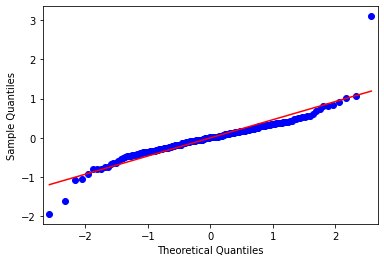

In [64]:
m_2 = sm.OLS(Y_train, X_train2)
m_2_fit = m_2.fit()
print(m_2_fit.summary())
sm.qqplot(m_2_fit.resid, line= 's')
plt.show()

Creating Model 3

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     31.66
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           7.43e-44
Time:                        10:32:43   Log-Likelihood:                -128.20
No. Observations:                 197   AIC:                             290.4
Df Residuals:                     180   BIC:                             346.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8541      0.158     24.375      0.0

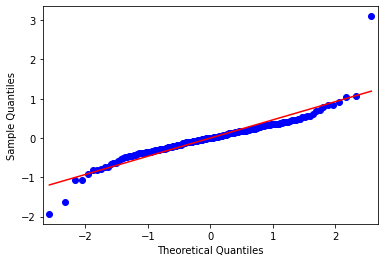

In [65]:
X_train3 = X_train2.drop(['x6'],axis=1)
X_test3 = X_test2.drop(['x6'],axis=1)
m_3 = sm.OLS(Y_train, X_train3)
m_3_fit = m_3.fit()
print(m_3_fit.summary())
sm.qqplot(m_3_fit.resid, line= 's')
plt.show()

Creating Model 4

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     33.80
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.68e-44
Time:                        10:32:43   Log-Likelihood:                -128.53
No. Observations:                 197   AIC:                             289.1
Df Residuals:                     181   BIC:                             341.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8464      0.158     24.400      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


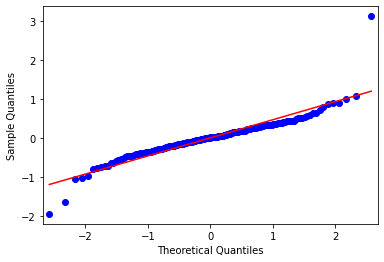

In [66]:
X_train4 = X_train3.drop(['x4'],axis=1)
X_test4 = X_test3.drop(['x4'],axis=1)
m_4 = sm.OLS(Y_train, X_train4)
m_4_fit = m_4.fit()
print(m_4_fit.summary())
sm.qqplot(m_4_fit.resid, line= 's')
plt.show()

Creating Model 5

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     39.38
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           4.66e-46
Time:                        10:32:43   Log-Likelihood:                -128.63
No. Observations:                 197   AIC:                             285.3
Df Residuals:                     183   BIC:                             331.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8300      0.152     25.171      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


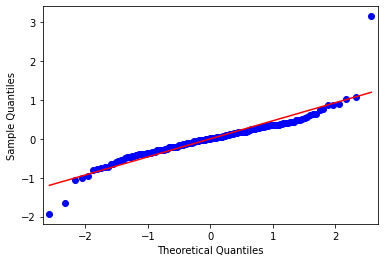

In [67]:
X_train5 = X_train4.drop(['x16','x17'],axis=1)
X_test5 = X_test4.drop(['x16','x17'],axis=1)
m_5 = sm.OLS(Y_train, X_train5)
m_5_fit = m_5.fit()
print(m_5_fit.summary())
sm.qqplot(m_5_fit.resid, line= 's')
plt.show()

Creating Model 6

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     42.84
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           7.58e-47
Time:                        10:32:43   Log-Likelihood:                -128.72
No. Observations:                 197   AIC:                             283.4
Df Residuals:                     184   BIC:                             326.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8332      0.152     25.278      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


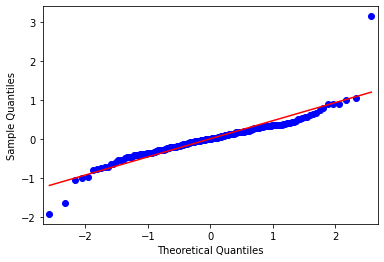

In [68]:
X_train6 = X_train5.drop(['x11'],axis=1)
X_test6 = X_test5.drop(['x11'],axis=1)
m_6 = sm.OLS(Y_train, X_train6)
m_6_fit = m_6.fit()
print(m_6_fit.summary())
sm.qqplot(m_6_fit.resid, line= 's')
plt.show()

Creating Model 7

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     46.80
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.40e-47
Time:                        10:32:43   Log-Likelihood:                -129.01
No. Observations:                 197   AIC:                             282.0
Df Residuals:                     185   BIC:                             321.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8571      0.148     26.083      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


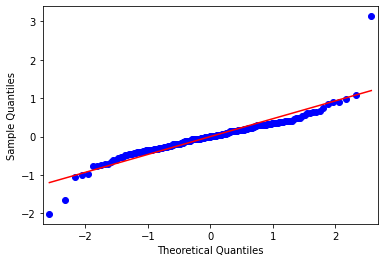

In [69]:
X_train7 = X_train6.drop(['x2'],axis=1)
X_test7 = X_test6.drop(['x2'],axis=1)
m_7 = sm.OLS(Y_train, X_train7)
m_7_fit = m_7.fit()
print(m_7_fit.summary())
sm.qqplot(m_7_fit.resid, line= 's')
plt.show()

Creating Model 8

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     51.56
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.44e-48
Time:                        10:32:44   Log-Likelihood:                -129.28
No. Observations:                 197   AIC:                             280.6
Df Residuals:                     186   BIC:                             316.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9080      0.130     30.155      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


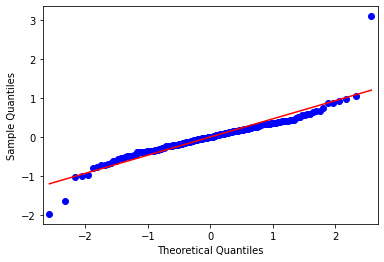

In [70]:
X_train8 = X_train7.drop(['x1'],axis=1)
X_test8 = X_test7.drop(['x1'],axis=1)
m_8 = sm.OLS(Y_train, X_train8)
m_8_fit = m_8.fit()
print(m_8_fit.summary())
sm.qqplot(m_8_fit.resid, line= 's')
plt.show()

Creating Model 9

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     56.95
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           6.75e-49
Time:                        10:32:44   Log-Likelihood:                -130.11
No. Observations:                 197   AIC:                             280.2
Df Residuals:                     187   BIC:                             313.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9087      0.130     30.116      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


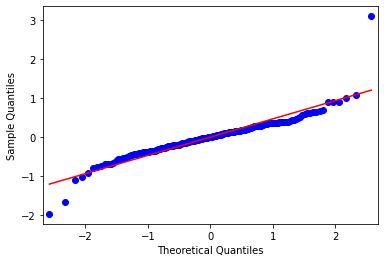

In [71]:
X_train9 = X_train8.drop(['x13'],axis=1)
X_test9 = X_test8.drop(['x13'],axis=1)
m_9 = sm.OLS(Y_train, X_train9)
m_9_fit = m_9.fit()
print(m_9_fit.summary())
sm.qqplot(m_9_fit.resid, line= 's')
plt.show()

Creating Model 10

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     63.88
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.43e-49
Time:                        10:32:44   Log-Likelihood:                -130.70
No. Observations:                 197   AIC:                             279.4
Df Residuals:                     188   BIC:                             309.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9076      0.130     30.098      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


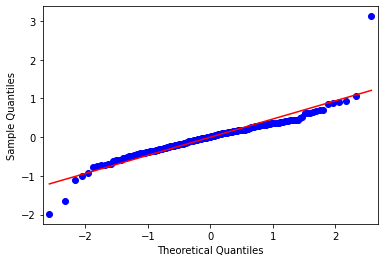

In [72]:
X_train10 = X_train9.drop(['x8'],axis=1)
X_test10 = X_test9.drop(['x8'],axis=1)
m_10 = sm.OLS(Y_train, X_train10)
m_10_fit = m_10.fit()
print(m_10_fit.summary())
sm.qqplot(m_10_fit.resid, line= 's')
plt.show()

Creating Model 11

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     72.57
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           3.45e-50
Time:                        10:32:44   Log-Likelihood:                -131.51
No. Observations:                 197   AIC:                             279.0
Df Residuals:                     189   BIC:                             305.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9639      0.122     32.522      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


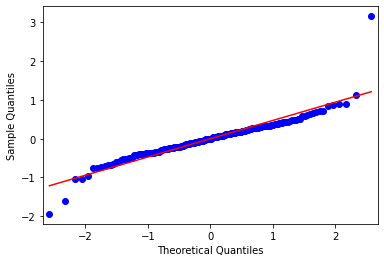

In [73]:
X_train11 = X_train10.drop(['league'],axis=1)
X_test11 = X_test10.drop(['league'],axis=1)
m_11 = sm.OLS(Y_train, X_train11)
m_11_fit = m_11.fit()
print(m_11_fit.summary())
sm.qqplot(m_11_fit.resid, line= 's')
plt.show()

Creating Model 12

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     84.14
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           7.87e-51
Time:                        10:32:44   Log-Likelihood:                -132.34
No. Observations:                 197   AIC:                             278.7
Df Residuals:                     190   BIC:                             301.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9901      0.120     33.170      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


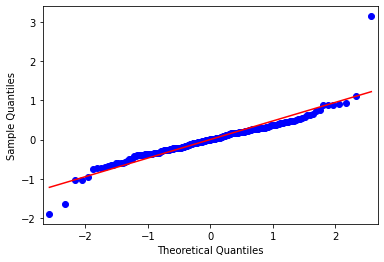

In [74]:
X_train12 = X_train11.drop(['x12'],axis=1)
X_test12 = X_test11.drop(['x12'],axis=1)
m_12 = sm.OLS(Y_train, X_train12)
m_12_fit = m_12.fit()
print(m_12_fit.summary())
sm.qqplot(m_12_fit.resid, line= 's')
plt.show()

Creating Model 13

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     101.1
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           9.80e-52
Time:                        10:32:44   Log-Likelihood:                -132.63
No. Observations:                 197   AIC:                             277.3
Df Residuals:                     191   BIC:                             297.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9681      0.117     34.053      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


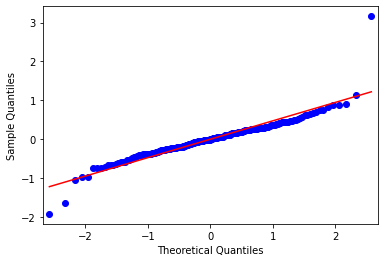

In [75]:
X_train13 = X_train12.drop(['x10'],axis=1)
X_test13 = X_test12.drop(['x10'],axis=1)
m_13 = sm.OLS(Y_train, X_train13)
m_13_fit = m_13.fit()
print(m_13_fit.summary())
sm.qqplot(m_13_fit.resid, line= 's')
plt.show()

C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

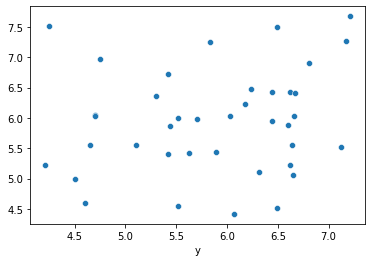

In [76]:
yt = pd.Series(Y_test)
m_f1 = pd.Series(m_13_fit.predict())
sns.scatterplot(yt,m_f1)

# Building Second Regression Model
(Using Log Salary as dependant variable and by taking annualized values)

In [77]:
data = df.copy()
data.drop('x14', axis =1, inplace=True)
data['league']=pd.get_dummies(df['x14'],drop_first=True)
data.head()

x1   x2  x3  x4  x5  x6  x7    x8    x9  x10  x11  x12  x13  x15  x16  \
1  315   81   7  24  38  39  14  3449   835   69  321  414  375  632   43   
2  479  130  18  66  72  76   3  1624   457   63  224  266  263  880   82   
3  496  141  20  65  78  37  11  5628  1575  225  828  838  354  200   11   
4  321   87  10  39  42  30   2   396   101   12   48   46   33  805   40   
5  594  169   4  74  51  35  11  4408  1133   19  501  336  194  282  421   

   x17      y  Log of salary  league  
1   10  475.0       6.163315       1  
2   14  480.0       6.173786       0  
3    3  500.0       6.214608       1  
4    4   91.5       4.516339       1  
5   25  750.0       6.620073       0

In [78]:
Y = np.log(data['y'])
X = data.copy()
X = sm.add_constant(X)
X

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const   x1   x2  x3  x4  x5  x6  x7    x8    x9  x10  x11  x12  x13  \
1      1.0  315   81   7  24  38  39  14  3449   835   69  321  414  375   
2      1.0  479  130  18  66  72  76   3  1624   457   63  224  266  263   
3      1.0  496  141  20  65  78  37  11  5628  1575  225  828  838  354   
4      1.0  321   87  10  39  42  30   2   396   101   12   48   46   33   
5      1.0  594  169   4  74  51  35  11  4408  1133   19  501  336  194   
..     ...  ...  ...  ..  ..  ..  ..  ..   ...   ...  ...  ...  ...  ...   
317    1.0  497  127   7  65  48  37   5  2703   806   32  379  311  138   
318    1.0  492  136   5  76  50  94  12  5511  1511   39  897  451  875   
319    1.0  475  126   3  61  43  52   6  1700   433    7  217   93  146   
320    1.0  573  144   9  85  60  78   8  3198   857   97  470  420  332   
321    1.0  631  170   9  77  44  31  11  4908  1457   30  775  357  249   

      x15  x16  x17       y  Log of salary  league  
1     632   43   10   475.0       6.163315       1  
2     880   82   14   480.0       6.173786       0  
3     200   11    3   500.0       6.214608       1  
4     805   40    4    91.5       4.516339       1  
5     282  421   25   750.0       6.620073       0  
..    ...  ...  ...     ...            ...     ...  
317   325    9    3   700.0       6.551080       1  
318   313  381   20   875.0       6.774224       0  
319    37  113    7   385.0       5.953243       0  
320  1314  131   12   960.0       6.866933       0  
321   408    4    3  1000.0       6.907755       0  

[263 rows x 20 columns]

In [79]:
X = sm.add_constant(X)

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [80]:
X['y square'] = X['x7']**2
X.drop("y", axis =1, inplace=True)
X['Runs/year'] = X['x11']/X['x7']
X

const   x1   x2  x3  x4  x5  x6  x7    x8    x9  ...  x11  x12  x13  \
1      1.0  315   81   7  24  38  39  14  3449   835  ...  321  414  375   
2      1.0  479  130  18  66  72  76   3  1624   457  ...  224  266  263   
3      1.0  496  141  20  65  78  37  11  5628  1575  ...  828  838  354   
4      1.0  321   87  10  39  42  30   2   396   101  ...   48   46   33   
5      1.0  594  169   4  74  51  35  11  4408  1133  ...  501  336  194   
..     ...  ...  ...  ..  ..  ..  ..  ..   ...   ...  ...  ...  ...  ...   
317    1.0  497  127   7  65  48  37   5  2703   806  ...  379  311  138   
318    1.0  492  136   5  76  50  94  12  5511  1511  ...  897  451  875   
319    1.0  475  126   3  61  43  52   6  1700   433  ...  217   93  146   
320    1.0  573  144   9  85  60  78   8  3198   857  ...  470  420  332   
321    1.0  631  170   9  77  44  31  11  4908  1457  ...  775  357  249   

      x15  x16  x17  Log of salary  league  y square  Runs/year  
1     632   43   10       6.163315       1       196  22.928571  
2     880   82   14       6.173786       0         9  74.666667  
3     200   11    3       6.214608       1       121  75.272727  
4     805   40    4       4.516339       1         4  24.000000  
5     282  421   25       6.620073       0       121  45.545455  
..    ...  ...  ...            ...     ...       ...        ...  
317   325    9    3       6.551080       1        25  75.800000  
318   313  381   20       6.774224       0       144  74.750000  
319    37  113    7       5.953243       0        36  36.166667  
320  1314  131   12       6.866933       0        64  58.750000  
321   408    4    3       6.907755       0       121  70.454545  

[263 rows x 21 columns]

In [81]:
X.drop("Log of salary", axis =1, inplace=True)
X

const   x1   x2  x3  x4  x5  x6  x7    x8    x9  x10  x11  x12  x13  \
1      1.0  315   81   7  24  38  39  14  3449   835   69  321  414  375   
2      1.0  479  130  18  66  72  76   3  1624   457   63  224  266  263   
3      1.0  496  141  20  65  78  37  11  5628  1575  225  828  838  354   
4      1.0  321   87  10  39  42  30   2   396   101   12   48   46   33   
5      1.0  594  169   4  74  51  35  11  4408  1133   19  501  336  194   
..     ...  ...  ...  ..  ..  ..  ..  ..   ...   ...  ...  ...  ...  ...   
317    1.0  497  127   7  65  48  37   5  2703   806   32  379  311  138   
318    1.0  492  136   5  76  50  94  12  5511  1511   39  897  451  875   
319    1.0  475  126   3  61  43  52   6  1700   433    7  217   93  146   
320    1.0  573  144   9  85  60  78   8  3198   857   97  470  420  332   
321    1.0  631  170   9  77  44  31  11  4908  1457   30  775  357  249   

      x15  x16  x17  league  y square  Runs/year  
1     632   43   10       1       196  22.928571  
2     880   82   14       0         9  74.666667  
3     200   11    3       1       121  75.272727  
4     805   40    4       1         4  24.000000  
5     282  421   25       0       121  45.545455  
..    ...  ...  ...     ...       ...        ...  
317   325    9    3       1        25  75.800000  
318   313  381   20       0       144  74.750000  
319    37  113    7       0        36  36.166667  
320  1314  131   12       0        64  58.750000  
321   408    4    3       0       121  70.454545  

[263 rows x 20 columns]

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=X['league'],test_size=0.25,random_state=1)

<AxesSubplot:xlabel='Log of salary', ylabel='Count'>

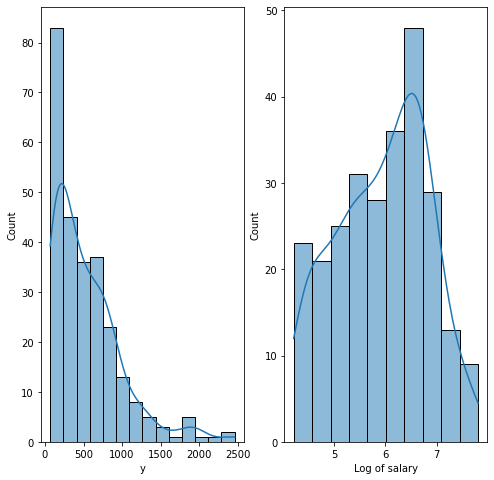

In [83]:
df['Log of salary']=np.log(df['y'])
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
sns.histplot(x=df['y'],kde =True)

plt.subplot(1,2,2)
sns.histplot(x=df['Log of salary'], kde =True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     27.54
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           5.48e-43
Time:                        10:32:45   Log-Likelihood:                -124.58
No. Observations:                 197   AIC:                             289.2
Df Residuals:                     177   BIC:                             354.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6557      0.177     20.626      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


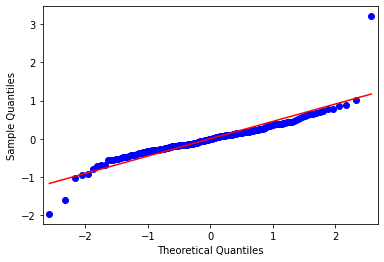

In [84]:
m_1 = sm.OLS(Y_train, X_train)
m_1_fit = m_1.fit()
print(m_1_fit.summary())
sm.qqplot(m_1_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     29.14
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.24e-43
Time:                        10:32:46   Log-Likelihood:                -124.83
No. Observations:                 197   AIC:                             287.7
Df Residuals:                     178   BIC:                             350.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6495      0.177     20.651      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


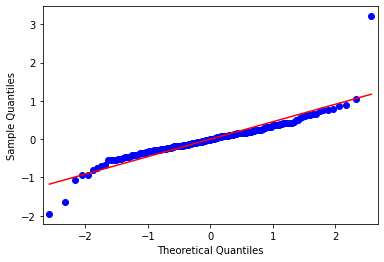

In [85]:
X_train2 = X_train.drop(['x6'],axis=1)
X_test2 = X_test.drop(['x6'],axis=1)
m_2 = sm.OLS(Y_train, X_train2)
m_2_fit = m_2.fit()
print(m_2_fit.summary())
sm.qqplot(m_2_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     31.00
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.33e-44
Time:                        10:32:46   Log-Likelihood:                -124.90
No. Observations:                 197   AIC:                             285.8
Df Residuals:                     179   BIC:                             344.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6517      0.176     20.726      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


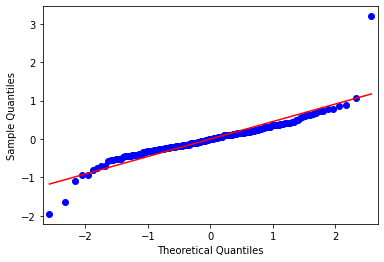

In [86]:
X_train3 = X_train2.drop(['x3'],axis=1)
X_test3 = X_test2.drop(['x3'],axis=1)
m_3 = sm.OLS(Y_train, X_train3)
m_3_fit = m_3.fit()
print(m_3_fit.summary())
sm.qqplot(m_3_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     33.08
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           4.24e-45
Time:                        10:32:46   Log-Likelihood:                -124.98
No. Observations:                 197   AIC:                             284.0
Df Residuals:                     180   BIC:                             339.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6432      0.174     20.912      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


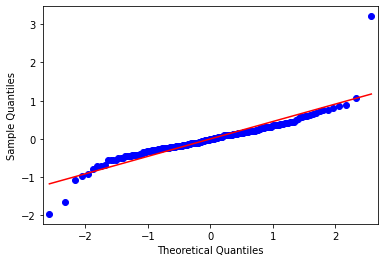

In [87]:
X_train4 = X_train3.drop(['x4'],axis=1)
X_test4 = X_test3.drop(['x4'],axis=1)
m_4 = sm.OLS(Y_train, X_train4)
m_4_fit = m_4.fit()
print(m_4_fit.summary())
sm.qqplot(m_4_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     35.30
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           9.79e-46
Time:                        10:32:46   Log-Likelihood:                -125.35
No. Observations:                 197   AIC:                             282.7
Df Residuals:                     181   BIC:                             335.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6286      0.173     20.952      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


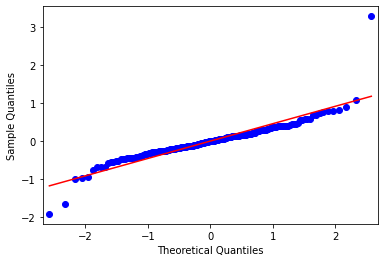

In [88]:
X_train5 = X_train4.drop(['x16'],axis=1)
X_test5 = X_test4.drop(['x16'],axis=1)
m_5 = sm.OLS(Y_train, X_train5)
m_5_fit = m_5.fit()
print(m_5_fit.summary())
sm.qqplot(m_5_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     38.02
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.58e-46
Time:                        10:32:46   Log-Likelihood:                -125.37
No. Observations:                 197   AIC:                             280.7
Df Residuals:                     182   BIC:                             330.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6247      0.172     21.132      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


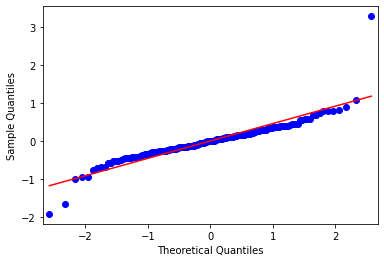

In [89]:
X_train6 = X_train5.drop(['x17'],axis=1)
X_test6 = X_test5.drop(['x17'],axis=1)
m_6 = sm.OLS(Y_train, X_train6)
m_6_fit = m_6.fit()
print(m_6_fit.summary())
sm.qqplot(m_6_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     40.73
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           4.97e-47
Time:                        10:32:46   Log-Likelihood:                -126.17
No. Observations:                 197   AIC:                             280.3
Df Residuals:                     183   BIC:                             326.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6801      0.166     22.228      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


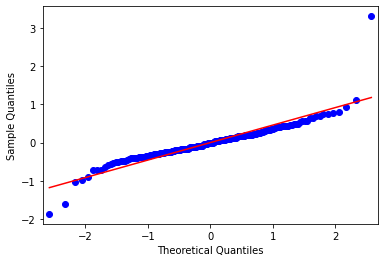

In [90]:
X_train7 = X_train6.drop(['league'],axis=1)
X_test7 = X_test6.drop(['league'],axis=1)
m_7 = sm.OLS(Y_train, X_train7)
m_7_fit = m_7.fit()
print(m_7_fit.summary())
sm.qqplot(m_7_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     43.85
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.59e-47
Time:                        10:32:47   Log-Likelihood:                -127.02
No. Observations:                 197   AIC:                             280.0
Df Residuals:                     184   BIC:                             322.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6983      0.165     22.389      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


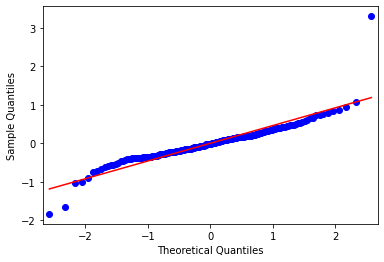

In [91]:
X_train8 = X_train7.drop(['x12'],axis=1)
X_test8 = X_test7.drop(['x12'],axis=1)
m_8 = sm.OLS(Y_train, X_train8)
m_8_fit = m_8.fit()
print(m_8_fit.summary())
sm.qqplot(m_8_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     47.81
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           3.37e-48
Time:                        10:32:47   Log-Likelihood:                -127.47
No. Observations:                 197   AIC:                             278.9
Df Residuals:                     185   BIC:                             318.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7381      0.159     23.472      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


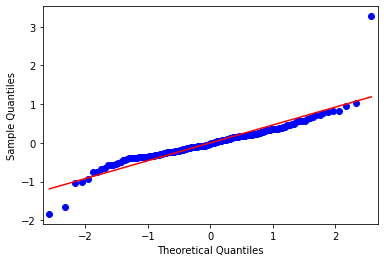

In [92]:
X_train9 = X_train8.drop(['x11'],axis=1)
X_test9 = X_test8.drop(['x11'],axis=1)
m_9 = sm.OLS(Y_train, X_train9)
m_9_fit = m_9.fit()
print(m_9_fit.summary())
sm.qqplot(m_9_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     52.64
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           6.09e-49
Time:                        10:32:47   Log-Likelihood:                -127.79
No. Observations:                 197   AIC:                             277.6
Df Residuals:                     186   BIC:                             313.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7308      0.159     23.491      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


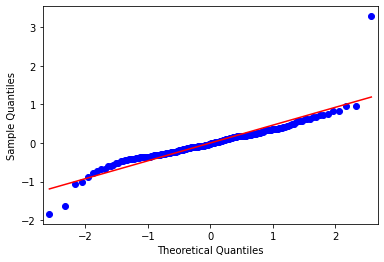

In [93]:
X_train10 = X_train9.drop(['x10'],axis=1)
X_test10 = X_test9.drop(['x10'],axis=1)
m_10 = sm.OLS(Y_train, X_train10)
m_10_fit = m_10.fit()
print(m_10_fit.summary())
sm.qqplot(m_10_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     58.26
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           1.44e-49
Time:                        10:32:47   Log-Likelihood:                -128.46
No. Observations:                 197   AIC:                             276.9
Df Residuals:                     187   BIC:                             309.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7187      0.159     23.452      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


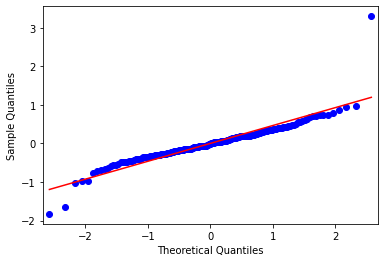

In [94]:
X_train11 = X_train10.drop(['x13'],axis=1)
X_test11 = X_test10.drop(['x13'],axis=1)
m_11 = sm.OLS(Y_train, X_train11)
m_11_fit = m_11.fit()
print(m_11_fit.summary())
sm.qqplot(m_11_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     65.41
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.82e-50
Time:                        10:32:47   Log-Likelihood:                -128.99
No. Observations:                 197   AIC:                             276.0
Df Residuals:                     188   BIC:                             305.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7811      0.146     25.919      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


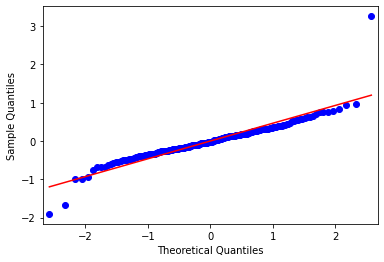

In [95]:
X_train12 = X_train11.drop(['x1'],axis=1)
X_test12 = X_test11.drop(['x1'],axis=1)
m_12 = sm.OLS(Y_train, X_train12)
m_12_fit = m_12.fit()
print(m_12_fit.summary())
sm.qqplot(m_12_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     74.71
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           4.71e-51
Time:                        10:32:47   Log-Likelihood:                -129.42
No. Observations:                 197   AIC:                             274.8
Df Residuals:                     189   BIC:                             301.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7574      0.143     26.193      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


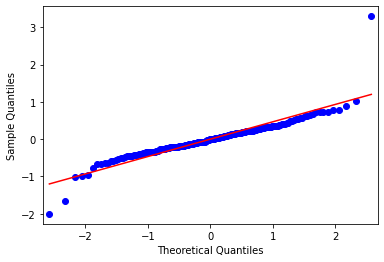

In [96]:
X_train13 = X_train12.drop(['x2'],axis=1)
X_test13 = X_test12.drop(['x2'],axis=1)
m_13 = sm.OLS(Y_train, X_train13)
m_13_fit = m_13.fit()
print(m_13_fit.summary())
sm.qqplot(m_13_fit.resid, line= 's')
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     86.92
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           8.44e-52
Time:                        10:32:48   Log-Likelihood:                -130.00
No. Observations:                 197   AIC:                             274.0
Df Residuals:                     190   BIC:                             297.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7817      0.142     26.695      0.0

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


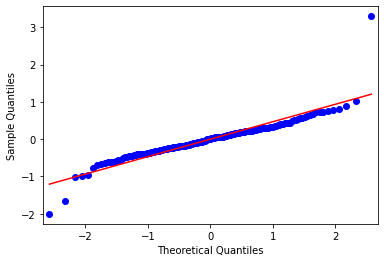

In [97]:
X_train14 = X_train13.drop(['x8'],axis=1)
X_test14 = X_test13.drop(['x8'],axis=1)
m_14 = sm.OLS(Y_train, X_train14)
m_14_fit = m_14.fit()
print(m_14_fit.summary())
sm.qqplot(m_14_fit.resid, line= 's')
plt.show()  

In [108]:
indices = m_14_fit.resid > 1.5 
a = m_14_fit.resid[indices]
print(a)

indices_2 =  m_14_fit.resid < -1
b =  m_14_fit.resid[indices_2]
print(b)

X_train14_modified = X_train14.drop([a.index[0],b.index[0]] ,axis =0)
Y_train_modified = Y_train.drop([a.index[0],b.index[0]])


model_14_modified_fit = sm.OLS(Y_train_modified,X_train14_modified).fit()

print(model_14_modified_fit.summary())

217    3.294086
dtype: float64
200   -1.006641
153   -1.649231
282   -2.002727
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     130.8
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           2.32e-64
Time:                        10:34:42   Log-Likelihood:                -96.335
No. Observations:                 195   AIC:                             206.7
Df Residuals:                     188   BIC:                             229.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


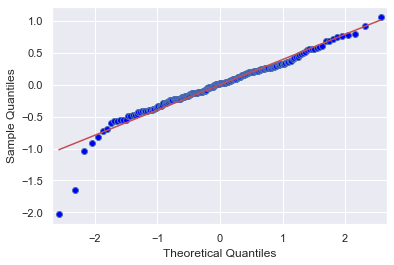

In [109]:
sm.qqplot(model_14_modified_fit.resid, line= 's')
plt.show()  

C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

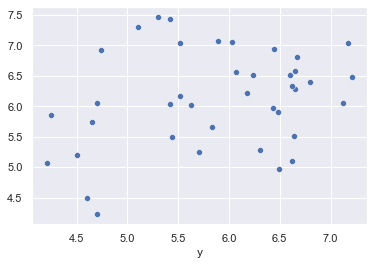

In [110]:
yt = pd.Series(Y_test)
m_f = pd.Series(model_14_modified_fit.predict())
sns.scatterplot(yt,m_f)

# **EDA**

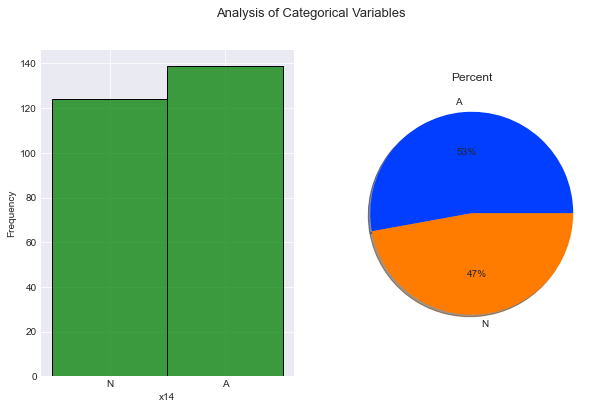

In [99]:
def cat_summary(dataframe, col_name, plot=False):
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(1, 2)
    ax = np.reshape(ax, (1, 2))
    ax[0, 0] = sns.histplot(x=dataframe[col_name], color="green", bins=10, ax=ax[0, 0])
    ax[0, 0].set_ylabel('Frequency')
        # ax[0, 0].set_title('Distribution')
    ax[0, 1] = plt.pie(dataframe[col_name].value_counts().values, labels=dataframe[col_name].value_counts().keys(),
                           colors=sns.color_palette('bright'), shadow=True, autopct='%.0f%%')
    plt.title("Percent")

    fig.set_size_inches(10, 6)
    fig.suptitle('Analysis of Categorical Variables', fontsize=13)
    plt.show()


for col in cat_cols:
    cat_summary(df, col, plot=True)

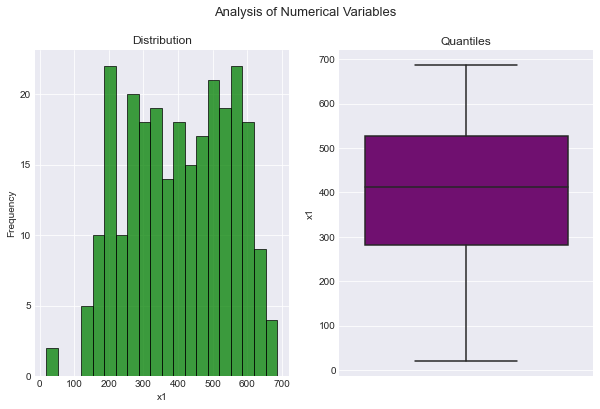

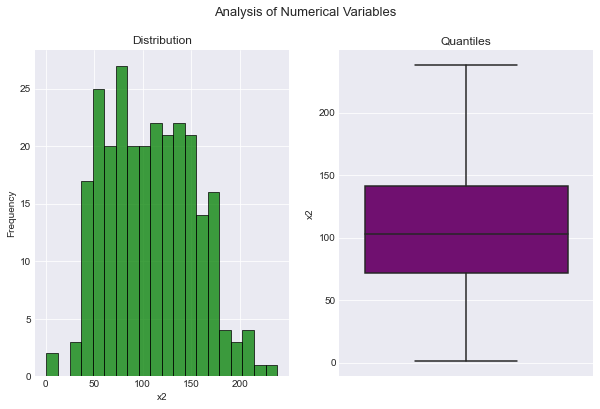

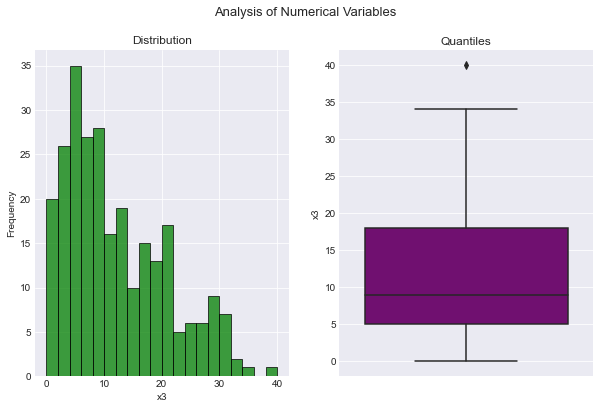

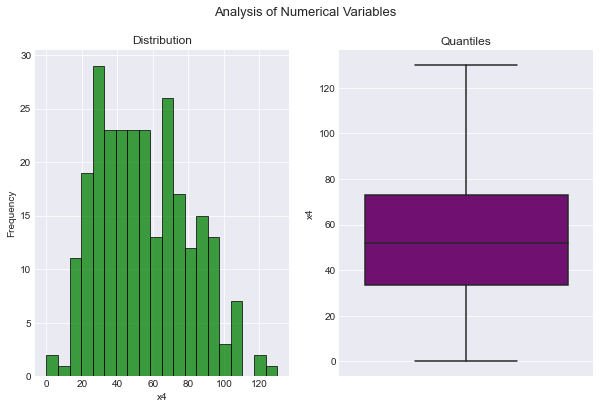

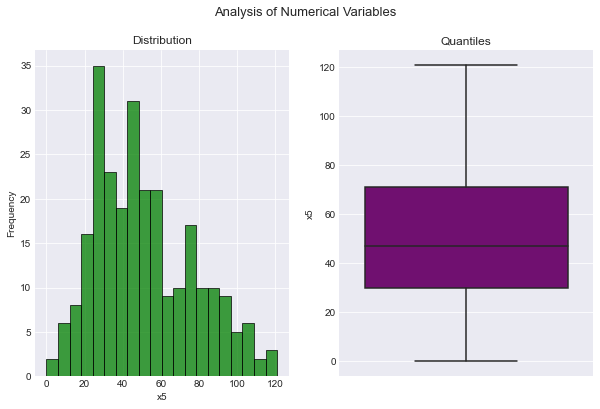

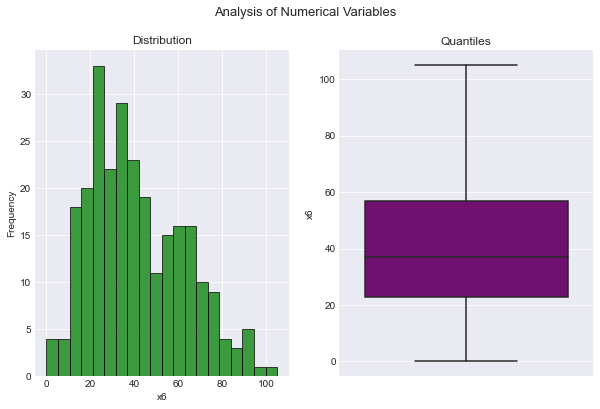

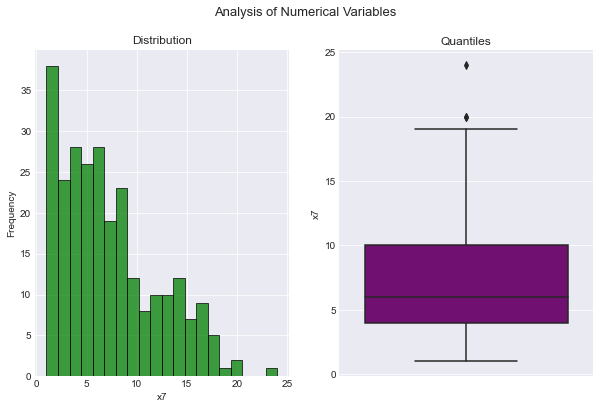

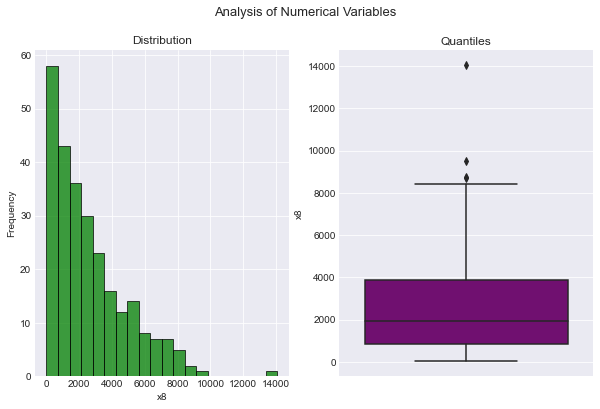

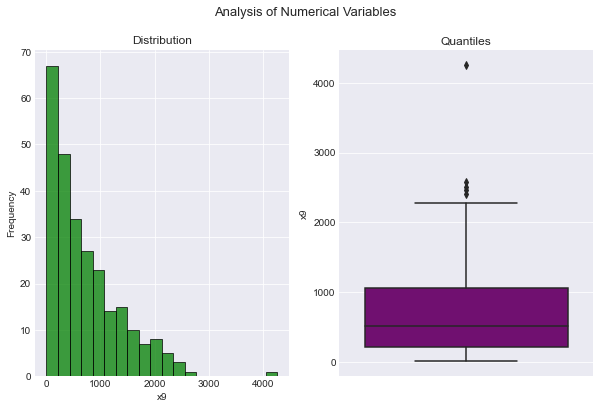

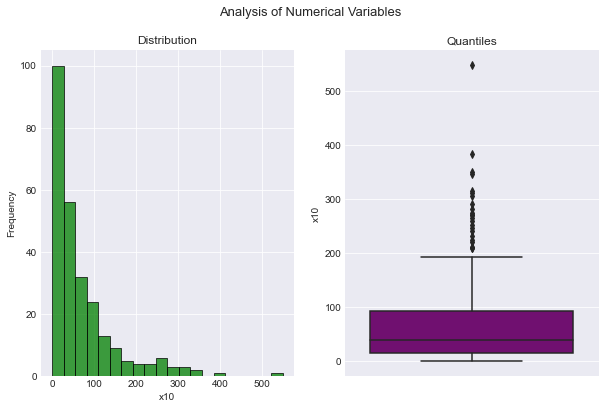

In [100]:
def num_summary(dataframe, numerical_col):
    # setup the plot grid
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(1, 2)
    ax = np.reshape(ax, (1, 2))
    ax[0, 0] = sns.histplot(x=dataframe[numerical_col], color="green", bins=20, ax=ax[0, 0])
    ax[0, 0].set_ylabel('Frequency')
    ax[0, 0].set_title('Distribution')
    ax[0, 1] = sns.boxplot(y=dataframe[numerical_col], color="purple", ax=ax[0, 1])
    ax[0, 1].set_title('Quantiles')

    fig.set_size_inches(10, 6)
    fig.suptitle('Analysis of Numerical Variables', fontsize=13)
    plt.show()

for col in num_cols[0:10]:
    num_summary(df, col)

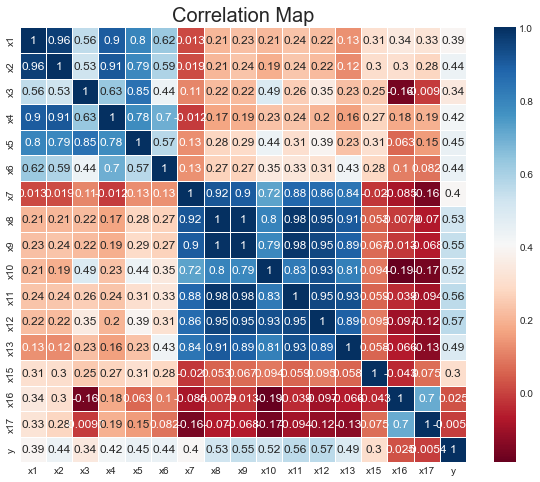

In [101]:
def correlation_matrix(dataframe, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Correlation Map', size=20)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w', cmap='RdBu')
    plt.show(block=True)

correlation_matrix(df, num_cols)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


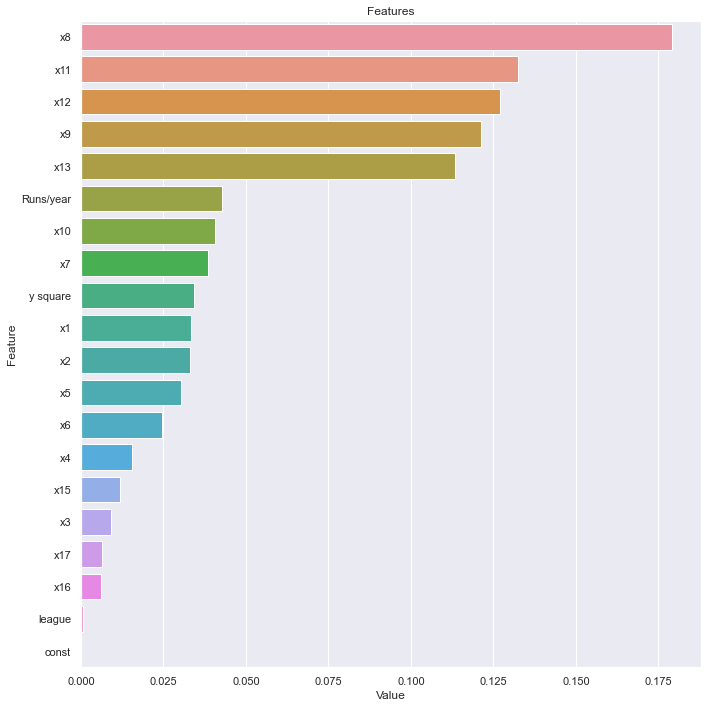

In [102]:
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_validate, validation_curve, train_test_split
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=17)

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 8, 15, "auto"],
             "min_samples_split": [8, 13, 15, 20],
             "n_estimators": [100, 200, 250,]}


rf_best_grid = GridSearchCV(rf_model,
                            rf_params,
                            cv=5,
                            n_jobs=-1,
                            verbose=True).fit(X, Y)

rf_final = rf_model.set_params(**rf_best_grid.best_params_,random_state=1).fit(X, Y)
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

plot_importance(rf_final, X)

# Building Model with the Variables obtained from EDA

In [103]:
X_F = df[['x8', 'x9', 'x11', 'x12', 'x13']].copy()
X_F

x8    x9  x11  x12  x13
1    3449   835  321  414  375
2    1624   457  224  266  263
3    5628  1575  828  838  354
4     396   101   48   46   33
5    4408  1133  501  336  194
..    ...   ...  ...  ...  ...
317  2703   806  379  311  138
318  5511  1511  897  451  875
319  1700   433  217   93  146
320  3198   857  470  420  332
321  4908  1457  775  357  249

[263 rows x 5 columns]

In [104]:
X_F = sm.add_constant(X_F)
X_F

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    x8    x9  x11  x12  x13
1      1.0  3449   835  321  414  375
2      1.0  1624   457  224  266  263
3      1.0  5628  1575  828  838  354
4      1.0   396   101   48   46   33
5      1.0  4408  1133  501  336  194
..     ...   ...   ...  ...  ...  ...
317    1.0  2703   806  379  311  138
318    1.0  5511  1511  897  451  875
319    1.0  1700   433  217   93  146
320    1.0  3198   857  470  420  332
321    1.0  4908  1457  775  357  249

[263 rows x 6 columns]

In [105]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(X_F,Y,test_size=0.25,random_state=1)

C:\Users\soumy\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     24.08
Date:                Sat, 16 Apr 2022   Prob (F-statistic):           9.46e-19
Time:                        10:33:29   Log-Likelihood:                -205.54
No. Observations:                 197   AIC:                             423.1
Df Residuals:                     191   BIC:                             442.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3925      0.082     66.066      0.0

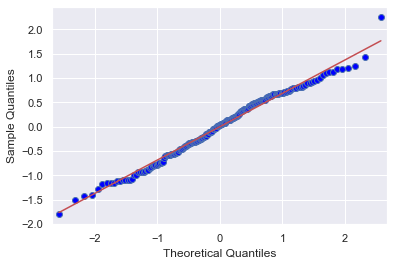

In [106]:
m_fin = sm.OLS(Y_train_f, X_train_f)
m_fin_fit = m_fin.fit()
print(m_fin_fit.summary())
sm.qqplot(m_fin_fit.resid, line= 's')
plt.show()

C:\Users\soumy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

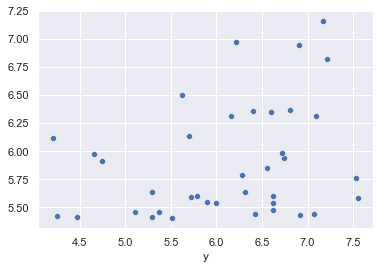

In [107]:
yt_f = pd.Series(Y_test_f)
m_f_fin = pd.Series(m_fin_fit.predict())
sns.scatterplot(yt_f,m_f_fin)

# Conclusion

As the model derived from the variables obtained from the EDA is giving us a prediction assurance of 38.7%, we should be going with the model derived from the brute force method, having 80% accuracy.